In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from numpy import genfromtxt


import pandas as pd

from mpl_toolkits import mplot3d
#%matplotlib notebook

In [21]:
inputParameters = pd.read_csv('../_inputParameters.csv',names=['key','value'])
inputParameters



,key,value
0,inputDataFolder,/Users/johannesschoeneberg/git/LatticeTrack/d...
1,outputDataFolder,/Users/johannesschoeneberg/git/LatticeTrack/d...
2,movieLength,70
3,allowedMaxNumDetectionsPerFrame,3000
4,framerate_msec,5689
5,sigma_detectionLoG,2
6,ch0_outputDataFolder,output_488
7,ch0_uniqueFilenameString,_488_
8,ch0_detectionFilename,Detection3D.mat
9,ch0_trackingFilename,trackedFeatures.mat


In [22]:
def getInputParameter(inputParametersPandas,key):
    #this locates the row, gets the result out of its array form and strips whitespaces away
    return (((inputParametersPandas.loc[inputParametersPandas['key'] == key]).values)[0,1]).strip()

In [23]:
resultsFolder = getInputParameter(inputParameters,"outputDataFolder")
trackingCsvFilename = getInputParameter(inputParameters,"ch0_trackingCsvFilename")
trackColor = getInputParameter(inputParameters,"ch0_trackColor")
#trackingBildFilename = getInputParameter(inputParameters,"trackingBildFilename")
#framerate_msec = float(getInputParameter(inputParameters,"framerate_msec"))
#movieLength = float(getInputParameter(inputParameters,"movieLength"))
print(trackColor)

#hack
#resultsFolder = "/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/matlab_lsm_tools_aguet/data_560/output/"
#trackColor = "red"

print(resultsFolder)

green
/Users/johannesschoeneberg/git/LatticeTrack/data/test_input/crop_100x100x100/output


In [24]:
data = pd.read_csv(resultsFolder+'/'+trackingCsvFilename,header=0)
data.columns = ["trackId", "tracklength", "frameId", "particleId", "x", "y", "z", "A", "noIdea1", "noIdea2", "noIdea3", "noIdea4"]
data[0:5]

,trackId,tracklength,frameId,particleId,x,y,z,A,noIdea1,noIdea2,noIdea3,noIdea4
0,1,70,1,274,5.126795e+01,7.902593e+01,5.787446e+01,1.917948e+04,9.356734e-02,9.339687e-02,9.340802e-02,8.302499e+02
1,1,70,2,276,5.181131e+01,7.952984e+01,5.998331e+01,1.970987e+04,7.643560e-02,7.665663e-02,7.627438e-02,6.949839e+02
2,1,70,3,0,5.141214e+01,7.961518e+01,5.895192e+01,1.565874e+04,1.085994e-01,1.083953e-01,1.081053e-01,7.831676e+02
3,1,70,4,0,5.231691e+01,7.949795e+01,5.913659e+01,1.832690e+04,9.992674e-02,1.001447e-01,1.010845e-01,8.372424e+02
4,1,70,5,0,5.186870e+01,8.002516e+01,5.967719e+01,1.838660e+04,8.418109e-02,8.394032e-02,8.405272e-02,7.145085e+02


In [25]:
len(data)

90468

In [26]:
trackId = 8
track = data[data['trackId'] == trackId]
track['x'].values.astype(float)

array([ 28.61666,  27.02108,  27.1225 ,  26.61661,  26.85931,  26.96068,
        26.54093,  26.51837,  26.07028,  26.46839,  27.02339,  27.46407,
        28.03281,  27.23027,  27.15566,  26.74662,  27.11425,  27.33111,
        27.44567,  26.74007,  27.05288,  27.71457,  27.79492,  27.62269,
        27.0056 ,  27.56531,  27.1837 ,  28.5183 ,  28.78542,  27.92805,
        29.44294,  30.41016,  29.1371 ,  30.5512 ,  29.29024,  29.55185,
        28.76911,  28.36621,  29.1073 ,  28.89846,  29.13702,  29.21998,
        28.79825,  27.68341,  28.31732,  27.65235,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,  28.04355,  27.21413,       nan,       nan,       nan,
             nan,       nan,       nan,       nan, 

Text(0,0.5,'amplitude')

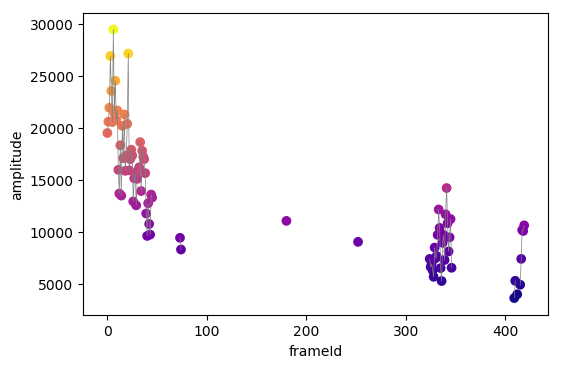

In [27]:
trackId = 8
track = data[data['trackId'] == trackId]
plt.figure(dpi=100)
ax = plt.axes()

# Data for a three-dimensional line
x = track['x'].values.astype(float)
y = track['y'].values.astype(float)
z = track['z'].values.astype(float)
intensity = track['A'].values.astype(float)

# Data for three-dimensional scattered points
#zdata = 15 * np.random.random(100)
#xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
#ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
#ax.scatter(x, y, z, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
#if(color=='intensity'):
#    ax.scatter3D(x, y, z, c=intensity, cmap='cool',s=100);
#else:
ax.plot(intensity,c='grey',lw=0.5)
ax.scatter(range(0,len(intensity)),intensity,c=intensity, cmap='plasma')
plt.xlabel('frameId')
plt.ylabel('amplitude')


Text(0.5,0,'z [px]')

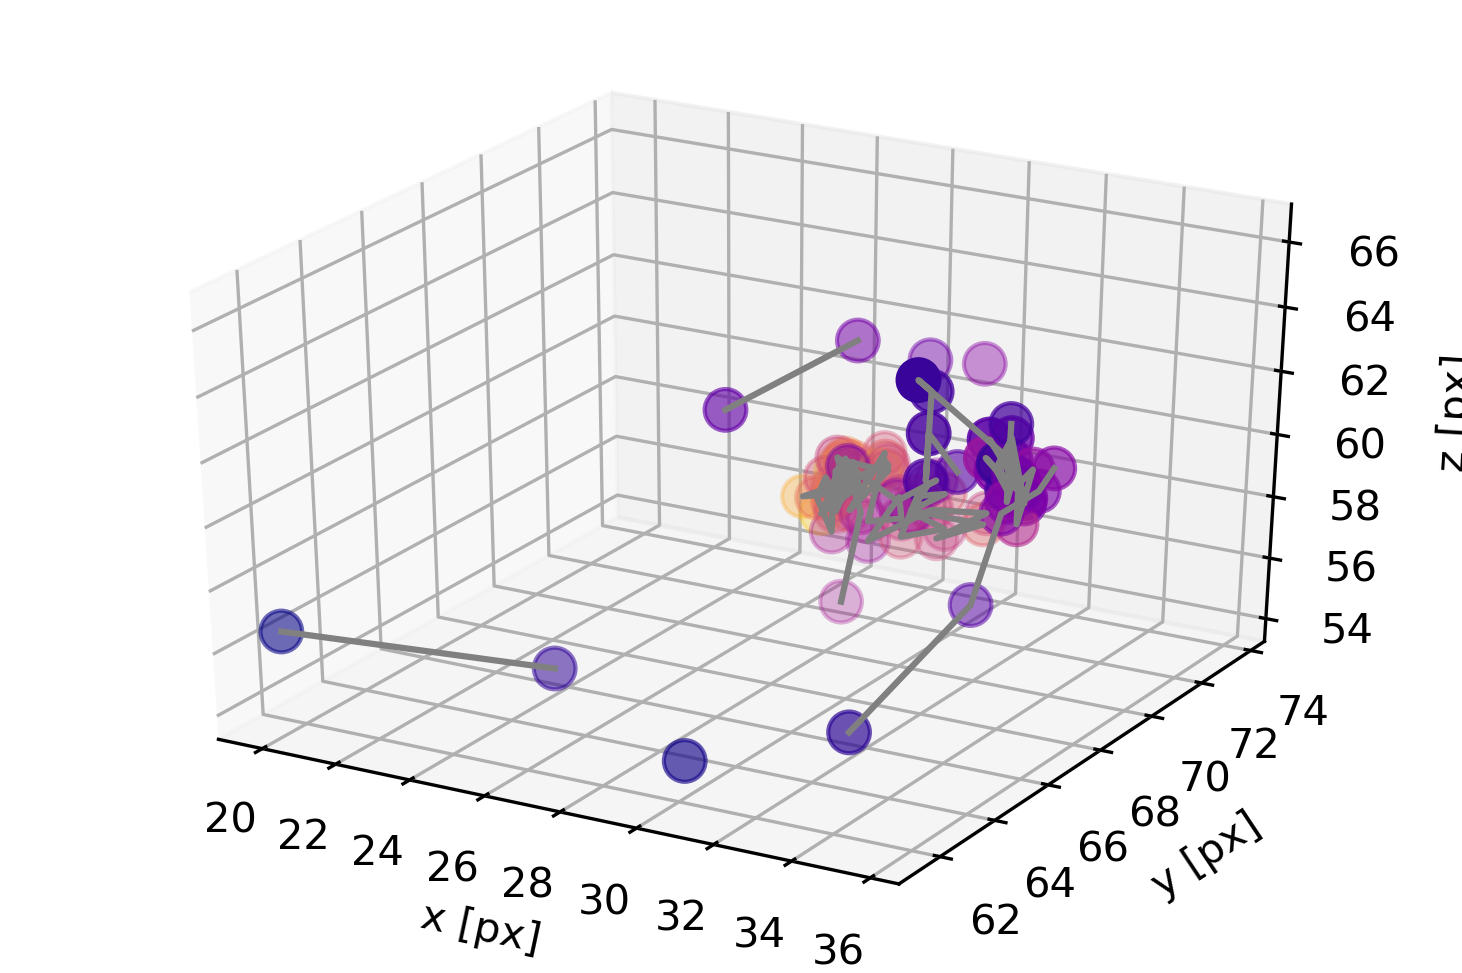

In [28]:
trackId = 8
track = data[data['trackId'] == trackId]
plt.figure(dpi=300)
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
x = track['x'].values.astype(float)
y = track['y'].values.astype(float)
z = track['z'].values.astype(float)
intensity = track['A'].values.astype(float)
ax.plot3D(x, y, z, 'grey')

# Data for three-dimensional scattered points
#zdata = 15 * np.random.random(100)
#xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
#ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
#ax.scatter(x, y, z, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
#if(color=='intensity'):
#    ax.scatter3D(x, y, z, c=intensity, cmap='cool',s=100);
#else:
ax.scatter3D(x, y, z,c=intensity, cmap='plasma',s=100);
plt.xlabel('x [px]')
plt.ylabel('y [px]')
ax.set_zlabel('z [px]')

In [29]:
def plotTrack(data,trackId,color='intensity'):
    track = data[data['TrackID'] == trackId]
    plt.figure(dpi=300)
    ax = plt.axes(projection='3d')
    
    # Data for a three-dimensional line
    x = track['Position X'].values
    y = track['Position Y'].values
    z = track['Position Z'].values
    intensity = track['Value'].values
    ax.plot3D(x, y, z, 'gray')
    
    # Data for three-dimensional scattered points
    #zdata = 15 * np.random.random(100)
    #xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
    #ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
    #ax.scatter(x, y, z, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
    if(color=='intensity'):
        ax.scatter3D(x, y, z, c=intensity, cmap='cool',s=100);
    else:
        ax.scatter3D(x, y, z, c=color, cmap='cool',s=100);

In [30]:
longtracks = data[data['tracklength'] >= 10]
print(len(longtracks))
print(len(np.unique(data['trackId'].values)))
print(np.unique(data['trackId'].values))

74045
7055
[   1    2    3 ..., 7053 7054 7055]


Text(0.5,0,'z [px]')

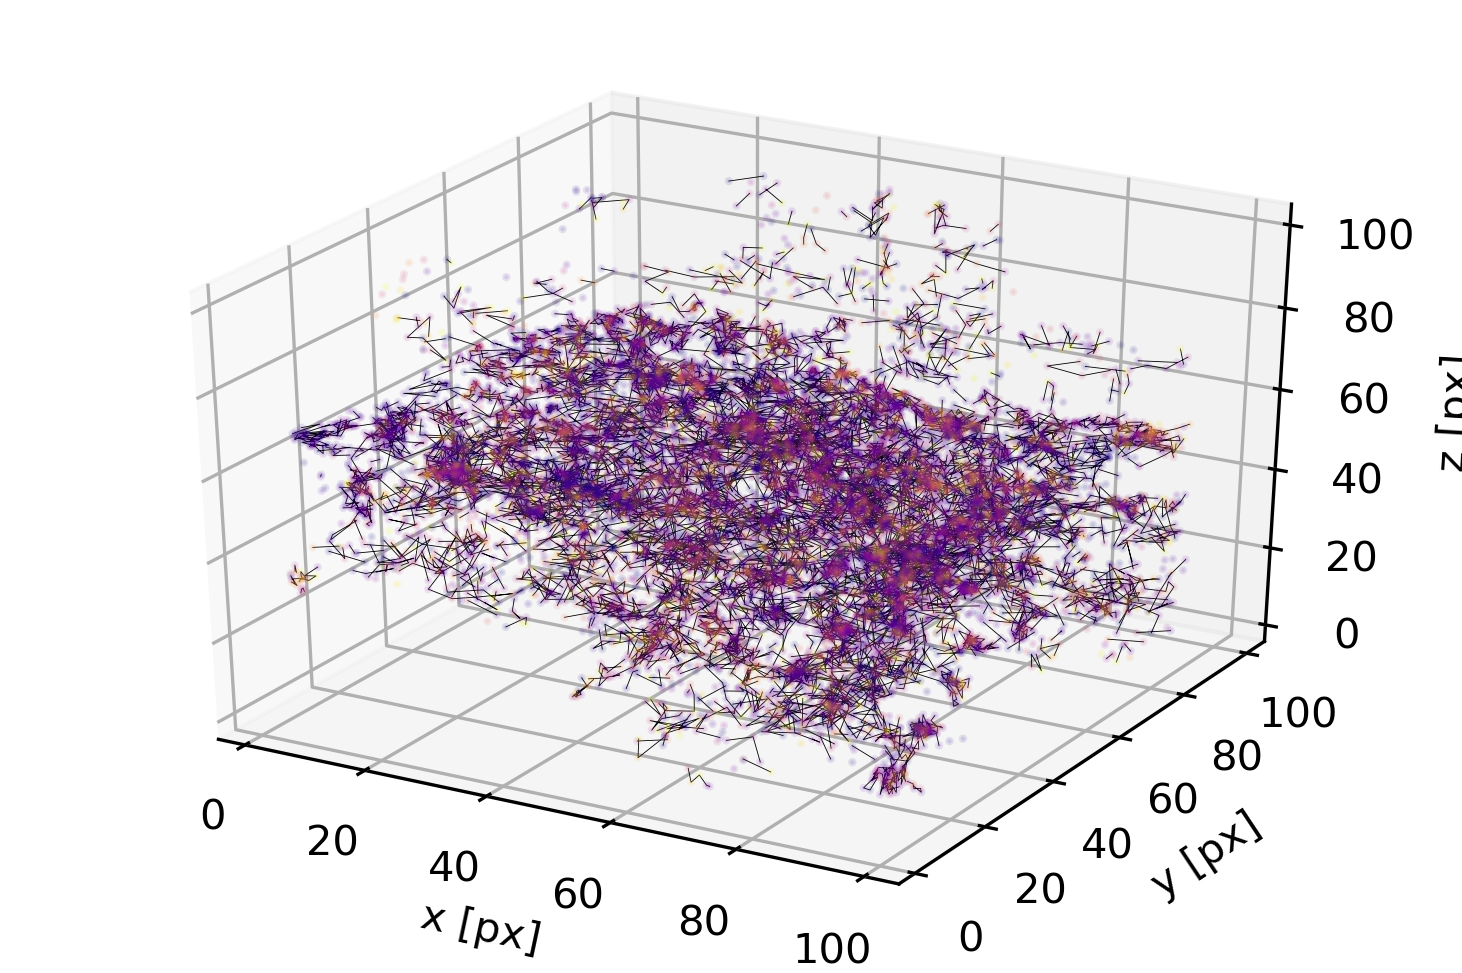

In [31]:
#plot them all

# WARNING: this takes ~3 min to plot.

plt.figure(dpi=300)

data = longtracks

ax = plt.axes(projection='3d')

for trackID in np.unique(data['trackId'].values):
    
    
    track = data[data['trackId'] == trackID]

    # Data for a three-dimensional line
    x = track['x'].values.astype(float)
    y = track['y'].values.astype(float)
    z = track['z'].values.astype(float)
    intensity = track['A'].values.astype(float)
    ax.plot3D(x, y, z, 'k',lw=0.2)
    ax.scatter3D(x, y, z, c=intensity, cmap='plasma',s=1,alpha=0.1);

ax.set_xlabel('x [px]')
ax.set_ylabel('y [px]')
ax.set_zlabel('z [px]')